In [6]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from quantum_dynamics import Dynamics
import numpy as np
from ions import Chain
from ion_trap import IonTrap
import matplotlib.pylab as plt  
from laser import *
%pylab inline
time_interval = (0., 2000.e-6)
time_precision = 2.e-6
times = np.arange(time_interval[0], time_interval[1], time_precision)

omegax = 2.0e6
omegaz = 150.e3
N = 5
chain = Chain(N, 2)
dummy_trap = IonTrap( omegax , omegaz)
dummy_trap.load(chain)

motional_state = (1,0,0,0,0)
electronic_state = (1,0,0,0,0)
laser = Laser( ion_num = 1, sideband_num = 1, intensity = 2*np.pi* 500.e3, phase = 2*np.pi* 0, detuning=0)
#chain.set_thermal_motional_state( motional_state )
chain.set_pure_motional_state( motional_state )
chain.set_pure_electronic_state_numbers( electronic_state )
dyn_w_laser = Dynamics(chain, lasers = [laser], pulses = [])
observables = [dyn_w_laser.excited_state_pop[0]]
dyn_w_laser.evolve_pure(time_interval, observables)

Populating the interactive namespace from numpy and matplotlib
Simulation running in RWA regime


`%matplotlib` prevents importing * from pylab and numpy


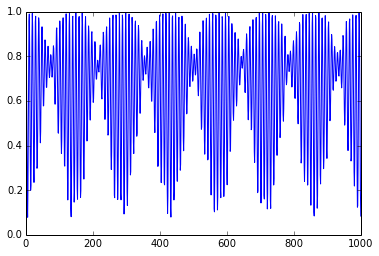

In [7]:
plt.plot(dyn_w_laser.expectations[0])

In [71]:
#Does qutip give the same results for 1 spin? Test:
from qutip import *
obs = [tensor( create(2)*destroy(2),  qeye(2)) ]
psi0 = tensor( basis(2,0), basis(2,0) )
out = mcsolve(H, psi0, times, [], obs)


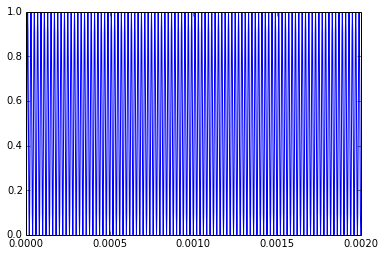

In [72]:
plt.plot(times, out.expect[0])
plt.show()

In [64]:
dyn_w_laser.free_hamiltonian

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[        0.00000000     +0.j                 0.00000000     +0.j
          0.00000000     +0.j                 0.00000000-157079.63267949j]
 [        0.00000000     +0.j          12566370.61435917     +0.j
          0.00000000     +0.j                 0.00000000     +0.j        ]
 [        0.00000000     +0.j                 0.00000000     +0.j
          0.00000000     +0.j                 0.00000000     +0.j        ]
 [        0.00000000+157079.63267949j         0.00000000     +0.j
          0.00000000     +0.j          12566370.61435917     +0.j        ]]

In [70]:
H

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.     +0.j          0.     +0.j          0.     +0.j
   0.-157079.63267949j]
 [ 0.     +0.j          0.     +0.j          0.     +0.j          0.     +0.j        ]
 [ 0.     +0.j          0.     +0.j          0.     +0.j          0.     +0.j        ]
 [ 0.+157079.63267949j  0.     +0.j          0.     +0.j          0.     +0.j        ]]

In [17]:
H = chain.couplings[0][0] * ( tensor( qeye(2), create(2), qeye(2)) * tensor( qeye(2) ,  destroy(2), qeye(2) )  ) + chain.couplings[1][1] * ( tensor( qeye(2), qeye(2), create(2)) * tensor( qeye(2) ,  qeye(2), create(2) )  ) + 1.j * laser.intensity * laser.eta * ( tensor( create(2), create(2)) - tensor(destroy(2), destroy(2) ) ))

SyntaxError: invalid syntax (<ipython-input-17-015c53f53b99>, line 1)

In [69]:
H =  1.j * laser.intensity * laser.eta * ( tensor( create(2), create(2) ) - tensor(destroy(2),  destroy(2) ) )

In [28]:
chain.initial_state

Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

In [9]:
chain.initial_state

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = [8, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

In [11]:
from qutip import *
tensor( basis(2,0), tensor(basis(2,1), basis(2,0)) )

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = [8, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

In [55]:
chain.couplings

[[12566370.614359172]]

In [2]:
N, electronic_state

(1, (1, 0, 0))